In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost
from datetime import datetime

In [58]:
data = pd.read_csv('/home/hasan/DATA SET/Diabetes DataSet/diabetes.csv')

In [59]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
data.shape

(768, 9)

In [61]:
#finding correlation
cor_mat = data.corr()
cor_mat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [62]:
top_cor_feature = cor_mat.index
top_cor_feature

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

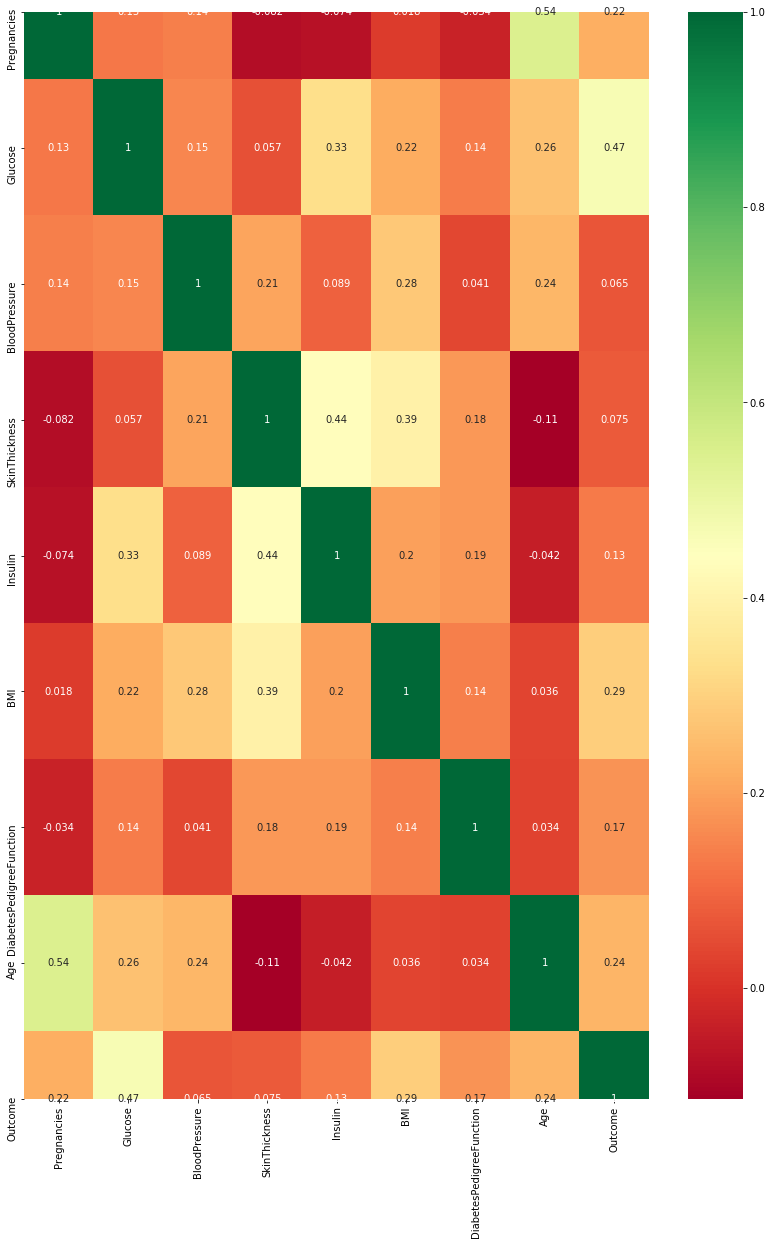

In [63]:
plt.figure(figsize=(14,20))
sns.heatmap(data[top_cor_feature].corr(), annot=True, cmap='RdYlGn')

# Checking balance/imbalance data

In [64]:
data['Outcome'].unique()

array([1, 0])

In [65]:
one_count = data[data['Outcome']==1].count()[0]
zero_count = data[data['Outcome']==0].count()[0]
print('Total number of one :',one_count)
print('Total number of zero :',zero_count)

Total number of one : 268
Total number of zero : 500


This is dataset is an imbalance data because diabetes and non-diabetes patients difference is huge

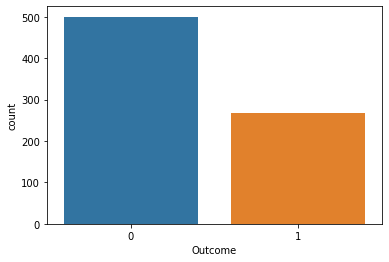

In [66]:
#ingraph
sns.countplot(data['Outcome'])

# Data Cleaning

In [67]:
#checking null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [68]:
#checking duplicate value
data.drop_duplicates(inplace=True)

# Removing Outlier

In [69]:
#using z-score
z_score = np.abs(stats.zscore(data))
z_score

array([[0.63994726, 0.84832379, 0.14964075, ..., 0.46849198, 1.4259954 ,
        1.36589591],
       [0.84488505, 1.12339636, 0.16054575, ..., 0.36506078, 0.19067191,
        0.73212021],
       [1.23388019, 1.94372388, 0.26394125, ..., 0.60439732, 0.10558415,
        1.36589591],
       ...,
       [0.3429808 , 0.00330087, 0.14964075, ..., 0.68519336, 0.27575966,
        0.73212021],
       [0.84488505, 0.1597866 , 0.47073225, ..., 0.37110101, 1.17073215,
        1.36589591],
       [0.84488505, 0.8730192 , 0.04624525, ..., 0.47378505, 0.87137393,
        0.73212021]])

In [70]:
threshold = 3
greater_than_threshold = np.where(z_score>threshold)
greater_than_threshold

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
         78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
        193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
        332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
        426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
        494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
        619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
        706, 753]),
 array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
        2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
        2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
        5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
        2, 2, 2, 5, 4]))

In [71]:
print(z_score[4][6])

5.484909100466951


In [72]:
data = data[(z_score<3).all(axis=1)]

In [73]:
#present number of rows and column of the data after removing outlier
data.shape

(688, 9)

# Dividing Dataset for Feature and Lavel data

In [74]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [75]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [76]:
#some feature columns have 0(zero). Need to remove those zero to get a good accuracy
print('Zeros in Pregnancies column :{0}'.format(len(X.loc[X['Pregnancies']==0])))
print('Zeros in Glucose column :{0}'.format(len(X.loc[X['Glucose']==0])))
print('Zeros in BloodPressure column :{0}'.format(len(X.loc[X['BloodPressure']==0])))
print('Zeros in SkinThickness column :{0}'.format(len(X.loc[X['SkinThickness']==0])))
print('Zeros in Insulin column :{0}'.format(len(X.loc[X['Insulin']==0])))
print('Zeros in BMI column :{0}'.format(len(X.loc[X['BMI']==0])))
print('Zeros in DiabetesPedigreeFunction column :{0}'.format(len(X.loc[X['DiabetesPedigreeFunction']==0])))
print('Zeros in BMI column :{0}'.format(len(X.loc[X['Age']==0])))

Zeros in Pregnancies column :91
Zeros in Glucose column :0
Zeros in BloodPressure column :0
Zeros in SkinThickness column :190
Zeros in Insulin column :324
Zeros in BMI column :0
Zeros in DiabetesPedigreeFunction column :0
Zeros in BMI column :0


In [77]:
#filling 0 with mean of the column
si = SimpleImputer(missing_values=0, strategy='mean')
X = si.fit_transform(X)
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [78]:
Xtrain,xtest, Ytrain,ytest = train_test_split(X,y, test_size=.3, random_state=10)

In [79]:
model = RandomForestClassifier(n_estimators=100)
model.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
model.score(xtest,ytest)

0.7632850241545893

In [81]:
predict = model.predict(xtest)
predict

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1])

In [82]:
#another way of finding accuracy
accuracy_score(ytest,predict)

0.7632850241545893

# Hyperperameter Tuning

In [83]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }


In [84]:
classifier=xgboost.XGBClassifier()

random_search = RandomizedSearchCV(classifier, 
                                   param_distributions=params, 
                                   n_iter=5, 
                                   scoring='roc_auc',
                                   n_jobs=5, 
                                   cv=5, 
                                   verbose=3)

In [85]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [86]:
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   7 out of  25 | elapsed:    0.1s remaining:    0.3s



 Time taken: 0 hours 0 minutes and 0.42 seconds.


[Parallel(n_jobs=5)]: Done  25 out of  25 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  25 out of  25 | elapsed:    0.4s finished


In [87]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [88]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [89]:
cvs = cross_val_score(classifier, X,y, cv=10)
cvs

array([0.67142857, 0.75362319, 0.72463768, 0.65217391, 0.73913043,
       0.73913043, 0.72463768, 0.76470588, 0.80882353, 0.79411765])

In [90]:
cvs.mean()

0.7372408963585434